Feature Scaling - Mandatory step in Deep Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


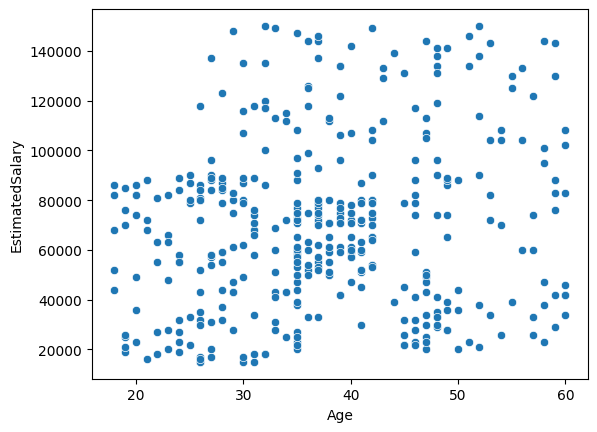

In [6]:
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1])
plt.show()


In [10]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]


In [11]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [14]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 41ms/step - loss: 431.5235 - accuracy: 0.5031 - val_loss: 161.3372 - val_accuracy: 0.3250
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 84.9006 - accuracy: 0.4781 - val_loss: 37.0602 - val_accuracy: 0.3250
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 51.8842 - accuracy: 0.5375 - val_loss: 64.4210 - val_accuracy: 0.6750
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 50.4468 - accuracy: 0.4969 - val_loss: 133.9440 - val_accuracy: 0.3250
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 101.0512 - accuracy: 0.4594 - val_loss: 65.6550 - val_accuracy: 0.3250
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 61.3595 - accuracy: 0.5156 - val_loss: 6.9480 - val_accuracy: 0.6750
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 41.6109 - accuracy: 0.5031 - val_loss: 138.5178 - val_accuracy: 0

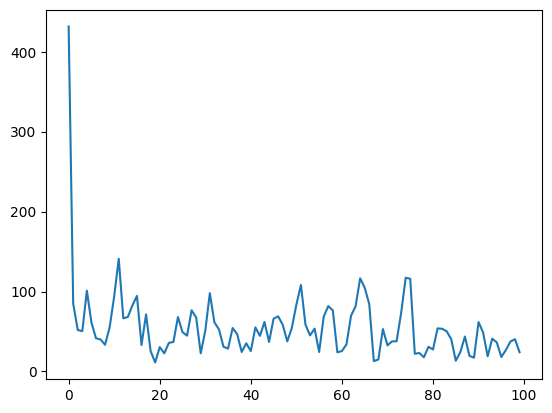

In [18]:
plt.plot(history.history['loss'])

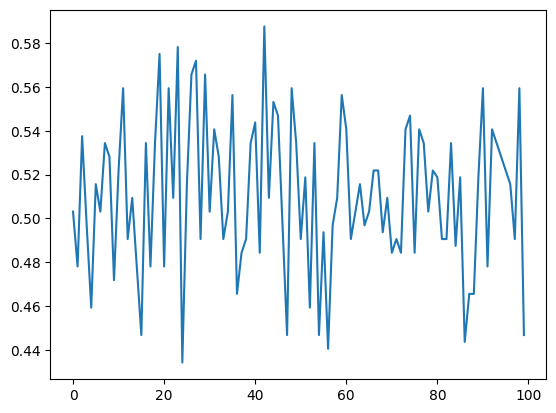

In [19]:
plt.plot(history.history['accuracy'])

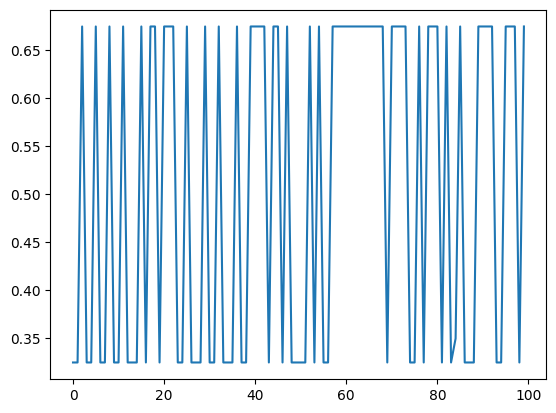

In [20]:
plt.plot(history.history['val_accuracy'])

APPLYING FEATURE SCALING METHOD

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.fit_transform(x_test)

In [22]:
x_train_scaler

array([[ 0.70196731, -1.28920196],
       [-0.9554555 , -0.31097586],
       [-0.9554555 ,  0.28188845],
       [ 0.01949909,  1.26011455],
       [ 0.99445369,  2.03083815],
       [ 1.48193098,  0.3708181 ],
       [-1.34543734, -0.42954872],
       [ 0.99445369,  1.46761706],
       [ 1.38443552, -1.43741804],
       [ 0.21449001,  0.04474273],
       [ 0.21449001,  0.16331559],
       [-0.85796004, -0.66669444],
       [-0.66296912, -0.04418692],
       [-0.27298729, -0.66669444],
       [-0.17549183,  0.87475276],
       [ 0.01949909, -0.31097586],
       [-0.85796004,  2.3272703 ],
       [ 1.77441736,  1.02296883],
       [ 0.40948093,  0.28188845],
       [ 2.06690374,  0.40046131],
       [-1.05295096, -1.14098588],
       [-0.27298729, -0.75562408],
       [ 0.01949909,  0.31153167],
       [-0.27298729, -0.13311656],
       [-0.27298729, -0.28133264],
       [-1.73541918,  0.48939096],
       [ 0.89695823,  1.05261205],
       [-0.76046458, -1.5559909 ],
       [-0.4679782 ,

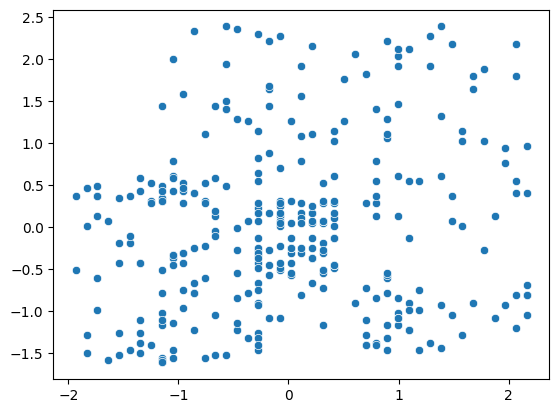

In [24]:
sns.scatterplot(x=x_train_scaler[:, 0], y=x_train_scaler[:, 1])
plt.show()


In [25]:
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_dim=2))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model1.fit(x_train_scaler, y_train, validation_data=(x_test_scaler, y_test), epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 14ms/step - loss: 0.6115 - accuracy: 0.8000 - val_loss: 0.5804 - val_accuracy: 0.7875
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5663 - accuracy: 0.8188 - val_loss: 0.5347 - val_accuracy: 0.8125
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5277 - accuracy: 0.8406 - val_loss: 0.4958 - val_accuracy: 0.8375
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4932 - accuracy: 0.8469 - val_loss: 0.4627 - val_accuracy: 0.8500
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4643 - accuracy: 0.8562 - val_loss: 0.4341 - val_accuracy: 0.8625
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4388 - accuracy: 0.8562 - val_loss: 0.4097 - val_accuracy: 0.8625
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4186 - accuracy: 0.8594 - val_loss: 0.3872 - val_accuracy: 0.8625
Epoch 8/100


In [26]:
# from the above we can observe that their is no bias, no variance and no underfitting 

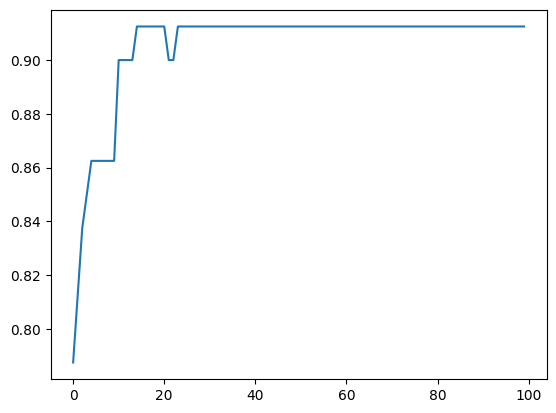

In [27]:
plt.plot(history.history['val_accuracy'])

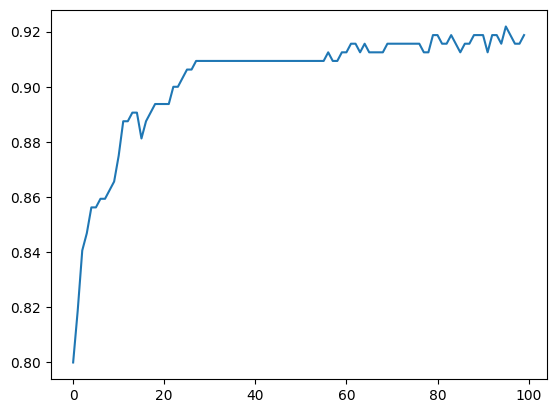

In [28]:
plt.plot(history.history['accuracy'])

DROPOUT

In [31]:
from tensorflow.keras.layers import Dropout


In [33]:
model2 = Sequential()
model2.add(Dense(128, activation='relu', input_dim=2))
model2.add(Dropout(0.5))
model2.add(Dense(128, activation='relu', input_dim=2))
model2.add(Dropout(0.4))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model2.fit(x_train_scaler, y_train, validation_data=(x_test_scaler, y_test), epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 17ms/step - loss: 0.6389 - accuracy: 0.6781 - val_loss: 0.5539 - val_accuracy: 0.8250
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5308 - accuracy: 0.8313 - val_loss: 0.4642 - val_accuracy: 0.8125
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4678 - accuracy: 0.8313 - val_loss: 0.3953 - val_accuracy: 0.8250
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4067 - accuracy: 0.8500 - val_loss: 0.3496 - val_accuracy: 0.8250
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3770 - accuracy: 0.8438 - val_loss: 0.3161 - val_accuracy: 0.8250
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3381 - accuracy: 0.8656 - val_loss: 0.2911 - val_accuracy: 0.8375
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3189 - accuracy: 0.8750 - val_loss: 0.2722 - val_accuracy: 0.8750
Epoch 8/100
